# Exploratory Data Analysis

The data has the following columns in the data:

- Product based features:
    - Item Identifier: Unique code for each item
    - Item Weight: The weight of the item selected in data
    - Item Fat Content: It is the amount of fats present in the item generally consumable edibles
    - Item Visibility: The amount of how much an item is being sold as a range of 0-1
    - Item Type: Dairy, Soft Drinks, Meat, Fruits and Vegetables and Household supplies
- Outlet based features:
    - Outlet Identifier: It is the unique code assigned to each outlet
    - Outlet Establishment Year: The founding year of outlet
    - Outlet Size: Bigger, Medium or Small
    - Outlet Location: It is based on rural to urban in form of Tiers
    - Outlet Type: Nature of the shop

- Target Variable:
    - Item Outlet Sales: Total sales done in the outlet

## Observations for Feature Engineering

### Product based Features

- The Item Identifier can be used to classify products into different categories and know which one belongs to food, consumables or drinks.
- The Item Weight has missing values that cannot be randomly replaced with the mean or median as there is a lot of variance within the products in terms of item weights.
- The Item Fat Content has no missing values but it has repetitive same meanings categories where Low-Fat, LF and lf means the same thing while reg and Regular also infers to the same meaning. Hence, it ideally having only two categorical values: Low Fat and Regular and should be mapped accordingly.
- The Item Visibility is the shelf life of products and determines a probability in its item outlet sales. Ideally, the item  which is more visible should be more commonly sold and should have higher sales compared to others.
- The Item Type is type of the products that are being sold.
- Item MRP is the retail selling price of the product that will be highly correlated with the sales and most important parameter in forecasting future sales.

### Outlet based Features

- The outlet identifier can be useful in identification of the type of outlet based on commonly occurring frequent series of outlet IDs for a certain type of store.
- Outlet Establishment Year can be used to make a new feature to determine the age of the outlet, starting from 1985 to 2009 which is the range of the column. This can be used to determine whether loyalty or older age can play a role in item outlet sales.
- Outlet Size has Small, Medium or Large values which actually correspond to the Grocery Store, Supermarket-2, Supermarket-1 and Supermarket-3 respectively.
- Outlet Location is determinant factor with correspondence to the type of outlet, for example we can suggest that the Outlet in Rural Areas might have more sales in Grocery Stores than Supermarkets due to availability issues and vice versa for Urban Areas.
- Outlet Type will be corresponding to the Outlet size as mentioned before.

## Hypothesis Generation

- Items with Low Fat Content have higher sales in the Urban Areas indicating diet conscious people.
- The items which are more visible tend to have higher sales but lower Item MRP.
- The Dairy Type items and Fruit and Vegetable should have highest sales as they are daily need items.
- Sales at larger sized outlets such as Supermarket-1 and Supermarket-3 should have higher sales.
- The higher aged outlets should be having higher sales than others.
- The Supermarkets must be having higher sales in Urban Locations due to more easily available feature.
- The Grocery Stores must be having higher sales in Rural areas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test])

In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
data.shape

(14204, 13)

In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

# Item Outlet Sales

- There are many outliers, in the Item Outlet Sales whose median is 1794.331, and there are many items at much higher price than the upper quadrant. This does not indicate need for removal of points with unusual behaviour as they can be products with higher prices such as electronics. However, we cannot see any such items in the Item Type list and thus it is indicative of many seasonal increase in the prices with a few exceptions. Also, only item outlet sales seems to have outliers and no other columns.

- The costliest product is a low fat household type item at 13000 approximately bought from the Supermarket The minimalist product cost is a low fat household item itself bought from the grocery store and a soft drink also bought from the grocery store. Hence, we cannot really comment directly based on item type and fat content whether it is priced higher or lower!

- The Item Outlet Sales is a one-tailed skewed distribution, which is indicating that the prices are more dense towards the left and has positive skewness with 1.177 value.

- The Medium sized outlets demonstrate highest amount of sales among all different outlet sizes

- Supermarket Type 3 has highest amount of sales which proves that urban areas and large outlet sizes have greater sales than grocery stores, and hence we are correct in our assumption.

- Medium Sized stores that can possibly be Supermarket-2 delivered best sales in earlier times of 1985, as we proceed towards the recent eras, the shift towards small sized grocery stores is an unusual observation proving our hypothesis wrong in assuming that high sized supermarkets should have best sales whatsoever.

- Medium sized outlets of Supermarket Type-3 have best sales in any category.
- Low fat content items have been sold most in Supermarket Type-3

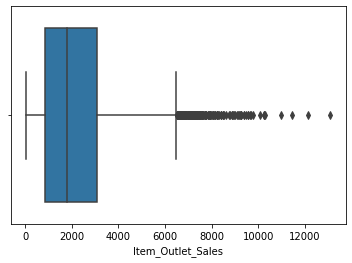

In [14]:
sns.boxplot(data=data, x='Item_Outlet_Sales')

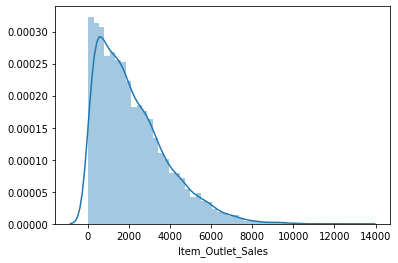

In [23]:
sns.distplot(data['Item_Outlet_Sales'])

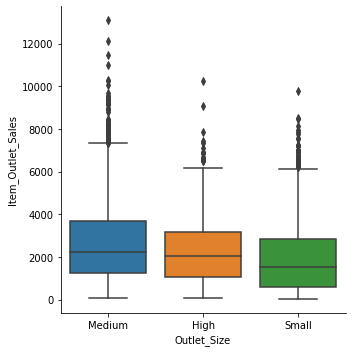

In [67]:
sns.catplot(kind='box', x='Outlet_Size', y='Item_Outlet_Sales', data=data)

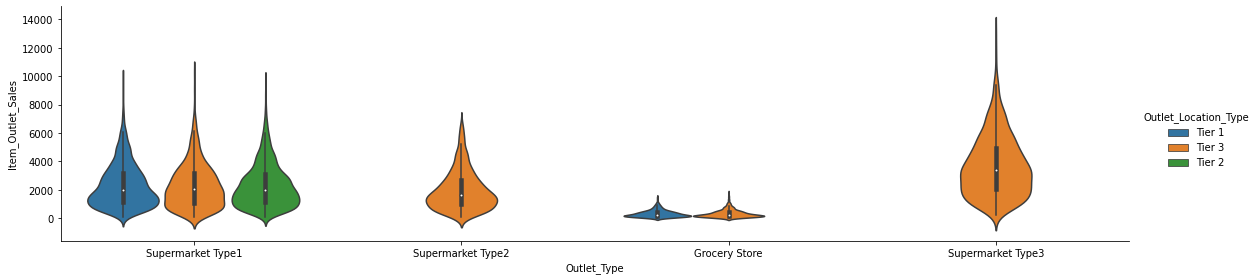

In [71]:
sns.catplot(kind='violin', x='Outlet_Type', y='Item_Outlet_Sales', data=data, height=4, aspect=4, hue='Outlet_Location_Type')

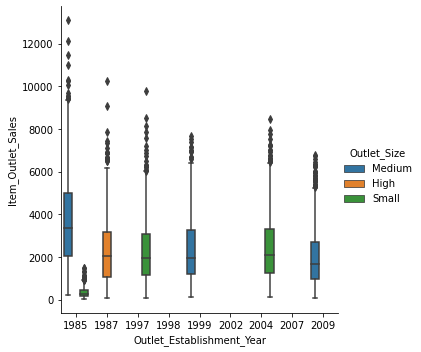

In [73]:
sns.catplot(kind='box', x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=data, hue='Outlet_Size')

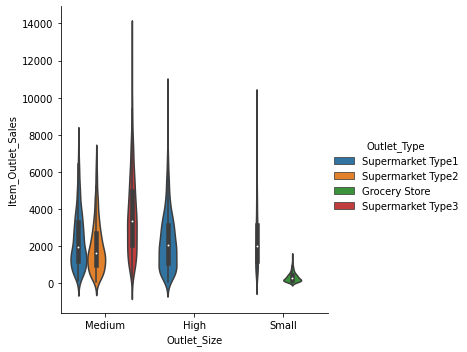

In [78]:
sns.catplot(kind='violin', x='Outlet_Size', y='Item_Outlet_Sales', data=data, hue='Outlet_Type')

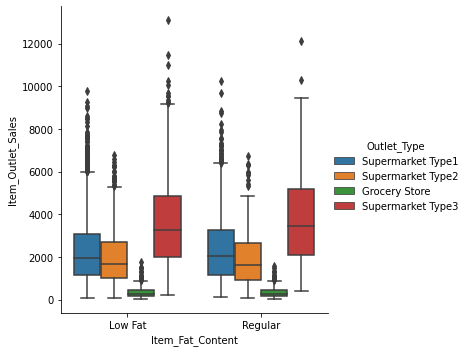

In [86]:
sns.catplot(kind='box', x='Item_Fat_Content', y='Item_Outlet_Sales', hue='Outlet_Type', data=data)

## Item Fat Content

- The item fat content has two distinct categories Low Fat and Regular which needs to be mapped along with LF, reg and low fat categorical values.
- There are many visible outliers in the item fat content that can be handled or removed if needed.
- Non-Consumable items having the prefix NC in the Item Identifiers should not have any fat content at all.
- The low-fat content items have higher sales than the corresponding Regular Fat items, and both have almost equitable distribution.
- Medium and Small Sized Outlets have higher sales of Low Fat Items than the High sized supermarkets.

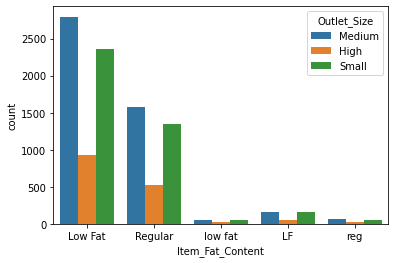

In [30]:
sns.countplot(x='Item_Fat_Content', data=data, hue='Outlet_Size')

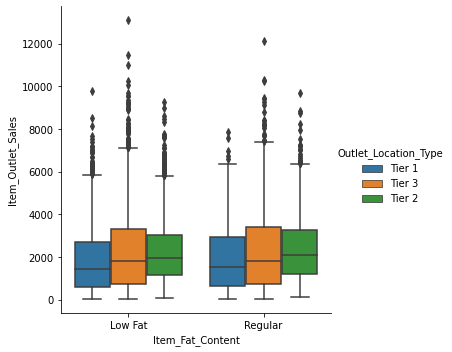

In [115]:
sns.catplot(x='Item_Fat_Content', data=data, hue='Outlet_Location_Type', y='Item_Outlet_Sales', kind='box')

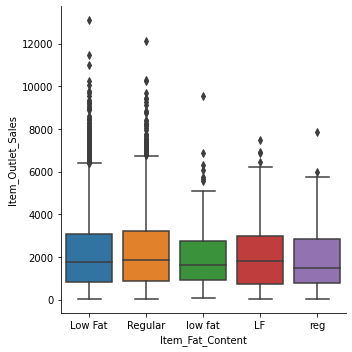

In [32]:
sns.catplot(kind='box', x='Item_Fat_Content', y='Item_Outlet_Sales', data=data)

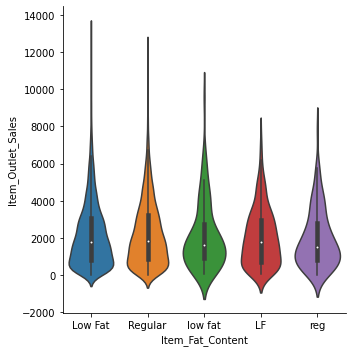

In [34]:
sns.catplot(kind='violin', x='Item_Fat_Content', y='Item_Outlet_Sales', data=data)

In [36]:
data['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

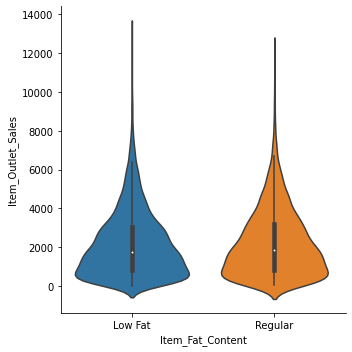

In [37]:
sns.catplot(kind='violin', x='Item_Fat_Content', y='Item_Outlet_Sales', data=data)

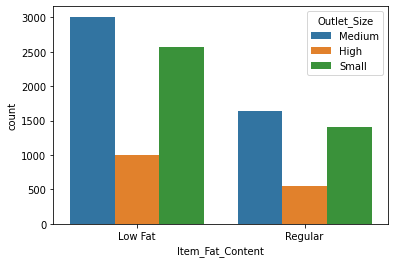

In [39]:
sns.countplot(x='Item_Fat_Content', data=data, hue='Outlet_Size')

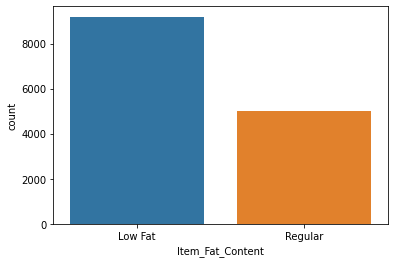

In [38]:
sns.countplot(x='Item_Fat_Content', data=data)

# Item MRP

- The highest sold items based on different types are Starchy Foods closely followed by Seafood and Dairy Products.
- The Item MRP is spread over a wide range, where the lower priced items, are having higher outlet sales, that indicates that more common needs or daily essentials have larger sales justifying our hypothesis.
- Item MRP is highly correlated with the Item Outlet Sales, making it one of the significant variables.
- The Item MRP is constant around different outlets and is thus independent of any outlet bias in terms of price range of different products.
- Item Weight is equally distributed over different MRPs and cannot be the deciding factor in this case.
- Item Visibility has no direct relationship with MRP either.


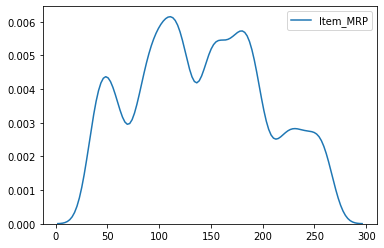

In [40]:
sns.kdeplot(data['Item_MRP'])

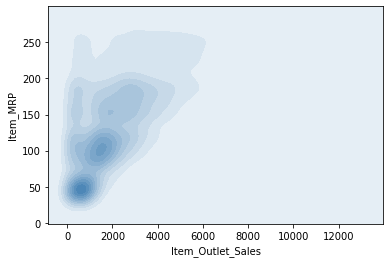

In [45]:
sns.kdeplot(train["Item_Outlet_Sales"], train["Item_MRP"], color="steelblue", shade=True)

Text(0, 0.5, 'item cost')

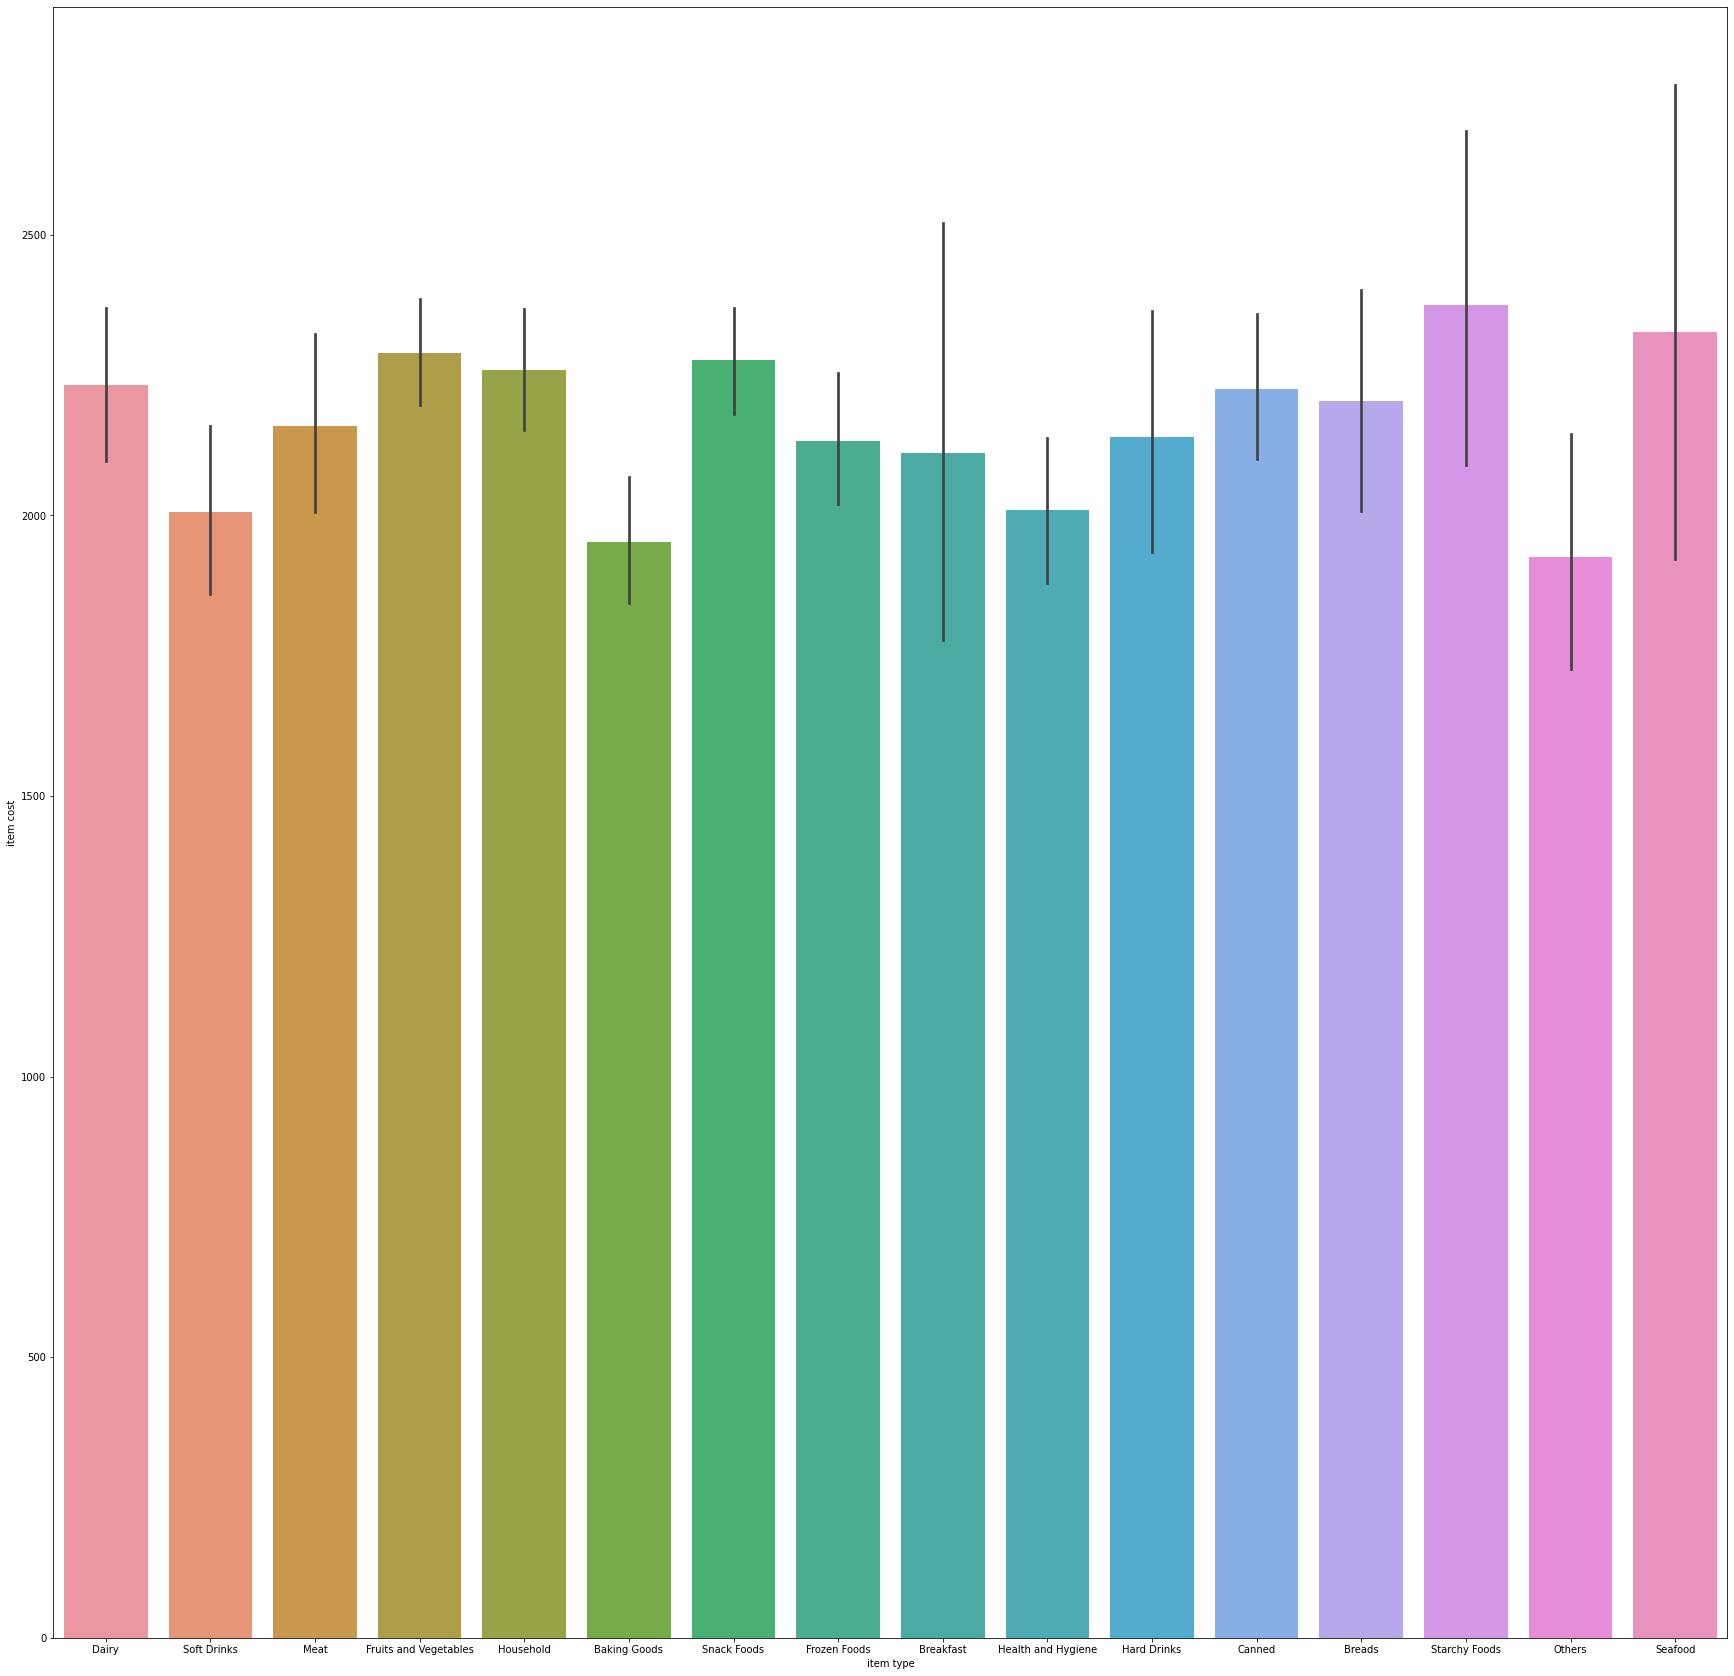

In [35]:
plt.figure(figsize=(30,30))
sns.barplot(x=train.Item_Type, y=train.Item_Outlet_Sales, data=train)
plt.xlabel('item type')
plt.ylabel('item cost')

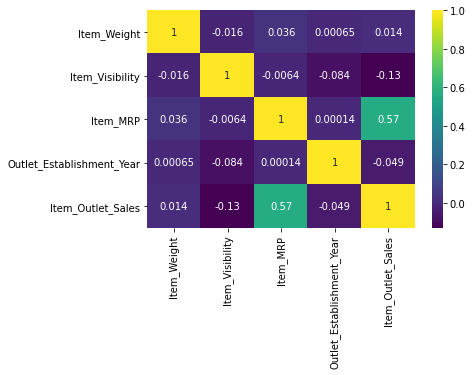

In [48]:
sns.heatmap(data.corr(), cmap='viridis', annot=True)

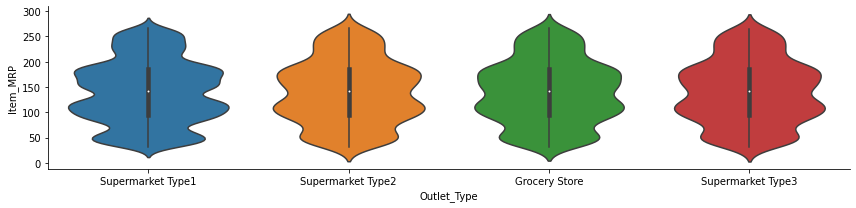

In [57]:
sns.catplot(kind='violin', x='Outlet_Type', y='Item_MRP', data=data, height=3, aspect=4)

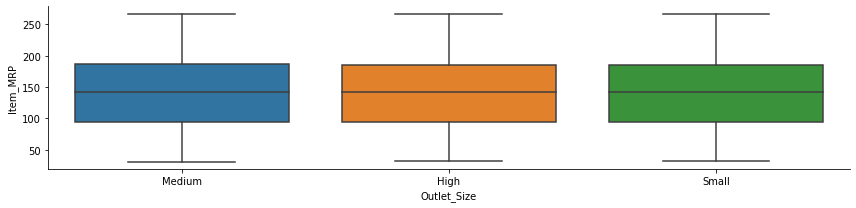

In [58]:
sns.catplot(kind='box', x='Outlet_Size', y='Item_MRP', data=data, height=3, aspect=4)

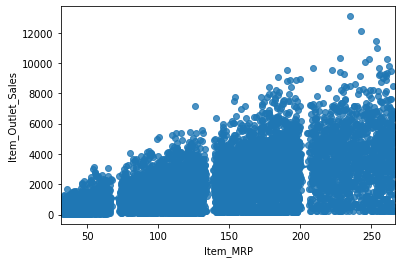

In [59]:
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=data)

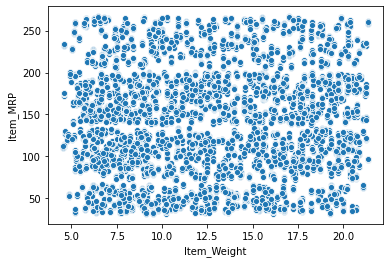

In [60]:
sns.scatterplot(x='Item_Weight', y='Item_MRP', data=data)

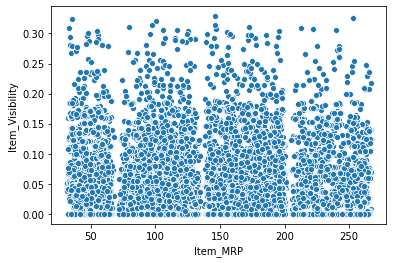

In [66]:
sns.scatterplot(y='Item_Visibility', x='Item_MRP', data=data)

# Item Visibility

- Item Visibility is not related to MRP in any much way and is equitably distributed
- A higher visibility does not indicate a direct increase in the item sales
- The item visibility does not have much of an impact in sales of Supermarket Type-1 in all areas
- It shows that it matters in terms of sales for medium sized grocery stores
- It matters in the Grocery Stores since 1985, but largely does not affect the Supermarkets all that much.
- Fat Content does not relate well with its visibility

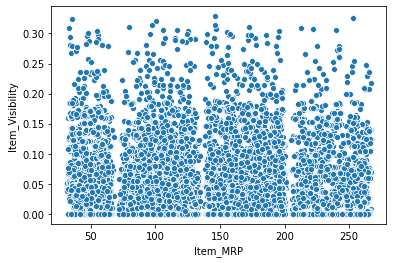

In [87]:
sns.scatterplot(y='Item_Visibility', x='Item_MRP', data=data)

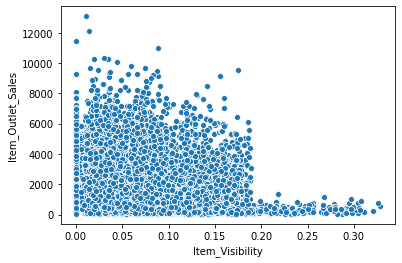

In [89]:
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=data)

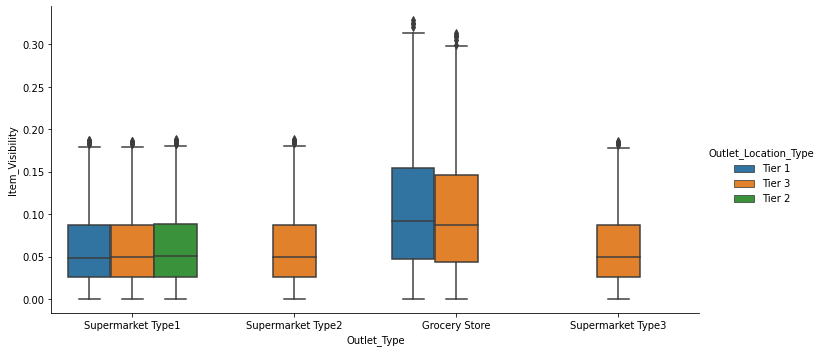

In [92]:
sns.catplot(kind='box', y='Item_Visibility', x='Outlet_Type', hue='Outlet_Location_Type', data=data, aspect=2)

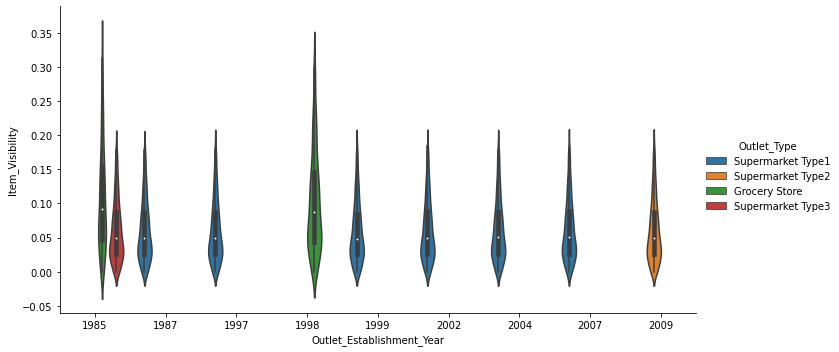

In [95]:
sns.catplot(kind='violin', x='Outlet_Establishment_Year', y='Item_Visibility', data=data, hue='Outlet_Type', aspect=2)

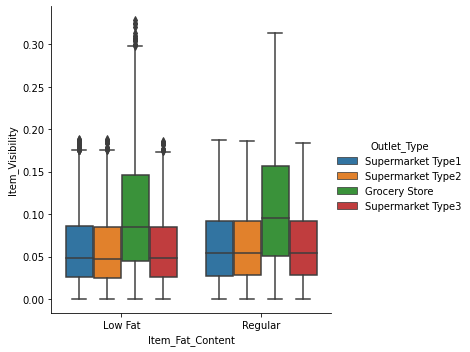

In [97]:
sns.catplot(kind='box', x='Item_Fat_Content', y='Item_Visibility', data=data, hue='Outlet_Type')

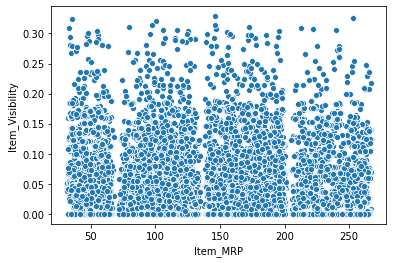

In [98]:
sns.scatterplot(x='Item_MRP', y='Item_Visibility', data=data)

# Item Type

- Snack Foods and Fruits and Vegetables tend to have higher sales in the Supermarkets
- Grocery Stores also have high sales of Snacks, Fruits and Vegetables as well as Frozen Foods
- Essential items or daily needs have higher visibility
- Item Weight has no significant impact on the Types of items.

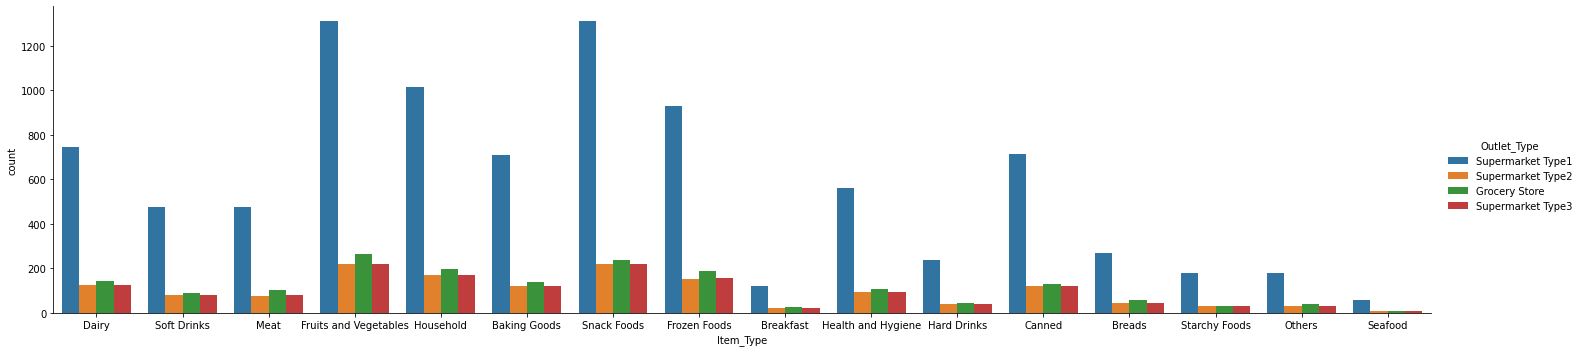

In [109]:
sns.catplot(kind='count', x='Item_Type', data=data, hue='Outlet_Type', aspect=4)

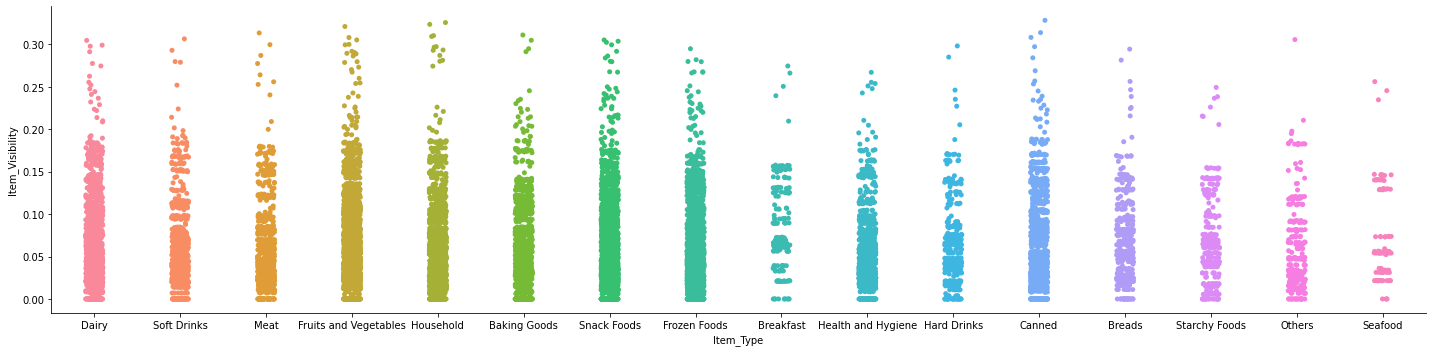

In [111]:
sns.catplot(x='Item_Type', y='Item_Visibility', data=data, aspect=4)

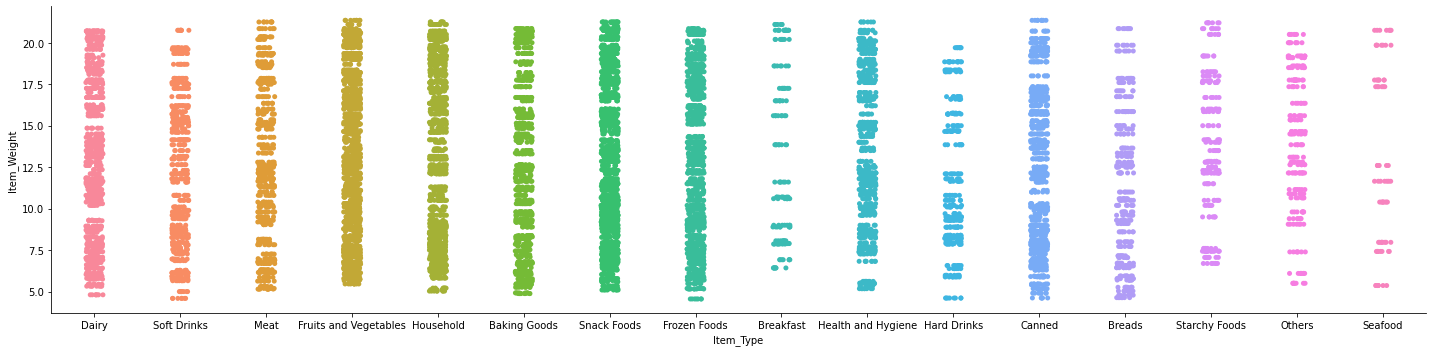

In [112]:
sns.catplot(x='Item_Type', y='Item_Weight', data=data, aspect=4)

# Summary

- Low Fat Content items have higher sales in both Tier-1 and Tier-3 cities equally almost, indicating diet consciousness is not constrained to urban areas.
- Items with higher visibility does not translate to higher sales or lower MRPs, infact visibility is equitable distributed.
- Snack Foods and Fruits and Vegetables have highest item sales in any outlet irrespective of locations.
- The higher aged Medium sized outlets displayed better sales than others.
- Supermarket Type-1 has larger size and translates to better sales, does not mean that well performing grocery stores are inferior to it, since they perform well with smaller size too.
- Supermarket Type-3 has most optimal sales performance followed by grocery stores in rural areas as well.